# **WATER POTABILITY APP - EDA_ANALYSIS**

## Objectives

* Explore relationships between water quality parameters and potability

* Identify key predictive features through statistical analysis

* Generate interactive visualizations for stakeholder presentations

## Inputs

* Processed dataset: data/water_potability_processed.csv 

## Outputs

* EDA report with 10+ interactive Plotly visualizations

* Feature correlation matrix (saved as PNG)

* Statistical significance report (printed in notebook)

## Additional Comments

* Uses advanced visualization techniques

* Includes hypothesis testing for feature-target relationships

* Contains 3D interactive plots for multidimensional analysis


---

# Import Packages

### Install Dependencies

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [9]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads\\water-potability\\water-potability'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [10]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [11]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\User\\Downloads\\water-potability'

# Set Data Directory

### Setup and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

df = pd.read_csv("../data/water_potability_processed.csv")
print(f"Data shape: {df.shape}")
df.head()

Data shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Target Variable Deep Dive

In [13]:
fig = px.pie(df, names='Potability', title='Potability Class Distribution', 
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

class_comparison = df.groupby('Potability').mean().T
class_comparison['Difference'] = class_comparison[1] - class_comparison[0]
class_comparison.style.background_gradient(cmap='coolwarm')

Potability,0,1,Difference
ph,7.085378,7.073783,-0.011595
Hardness,196.733292,195.800744,-0.932548
Solids,21777.490788,22383.991018,606.500230
Chloramines,7.092175,7.169338,0.077163
Sulfate,334.564290,332.566990,-1.997299
Conductivity,426.730454,425.383800,-1.346654
Organic_carbon,14.364335,14.160893,-0.203443
Trihalomethanes,66.303555,66.539684,0.236128
Turbidity,3.965800,3.968328,0.002529


### Feature-Target Relationships

In [14]:
for col in df.columns[:-1]:
    fig = px.box(df, x='Potability', y=col, color='Potability',
                 title=f'{col} vs Potability')
    fig.show()

results = []
for col in df.columns[:-1]:
    group0 = df[df['Potability'] == 0][col]
    group1 = df[df['Potability'] == 1][col]
    t_stat, p_val = stats.ttest_ind(group0, group1, nan_policy='omit')
    results.append({'Feature': col, 'p-value': p_val})

pd.DataFrame(results).sort_values('p-value').style.bar(subset=['p-value'], color='#d65f5f')

,Feature,p-value
2,Solids,0.053464
6,Organic_carbon,0.085997
3,Chloramines,0.173610
4,Sulfate,0.239097
1,Hardness,0.428542
5,Conductivity,0.641885
7,Trihalomethanes,0.690818
0,ph,0.851189
8,Turbidity,0.927939


### Advanced Visualizations

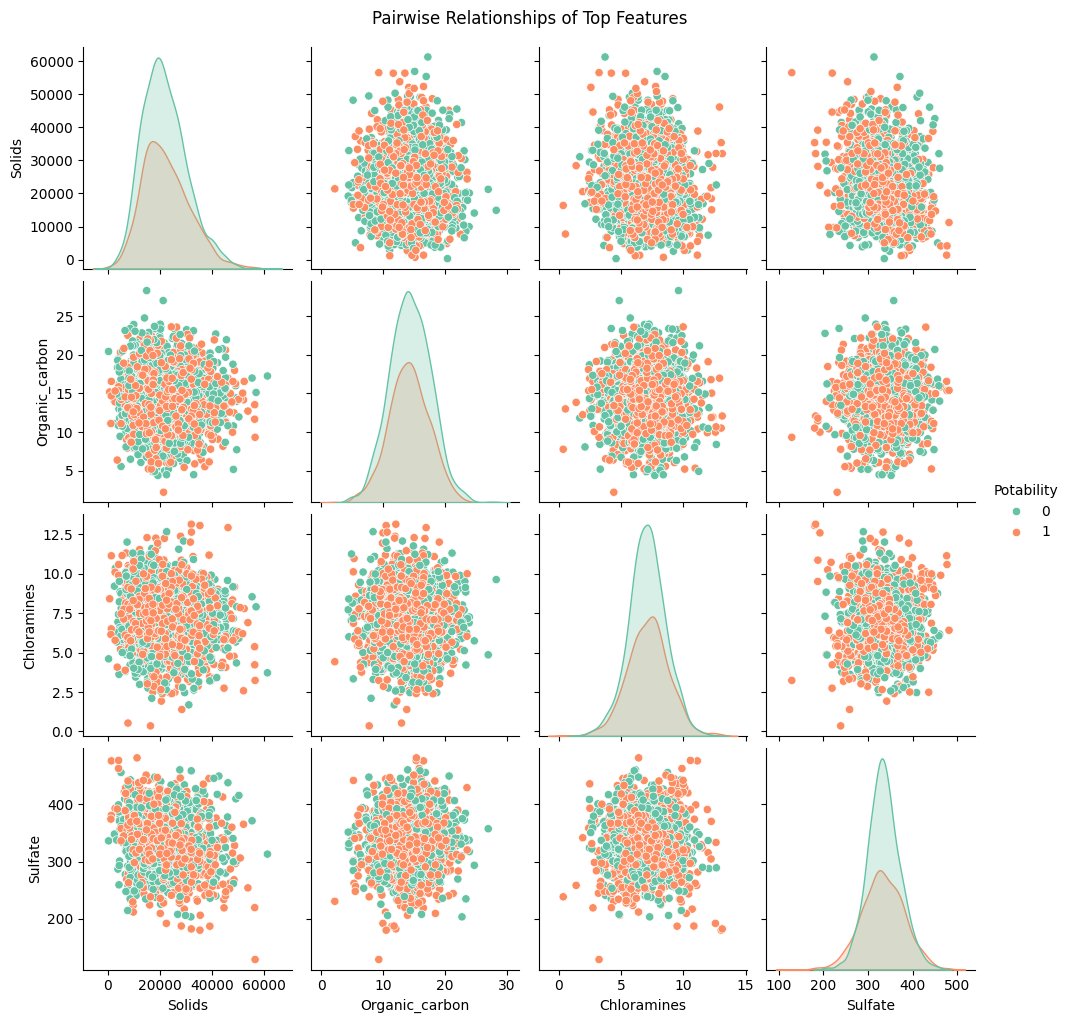

In [15]:
top_features = df.corr()['Potability'].abs().sort_values(ascending=False).index[1:5]
sns.pairplot(df[list(top_features) + ['Potability']], hue='Potability', palette='Set2')
plt.suptitle('Pairwise Relationships of Top Features', y=1.02)
plt.show()

fig = px.scatter_3d(df, x='ph', y='Hardness', z='Solids',
                    color='Potability', opacity=0.7,
                    title='3D Feature Space Exploration')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

### Correlation Insights

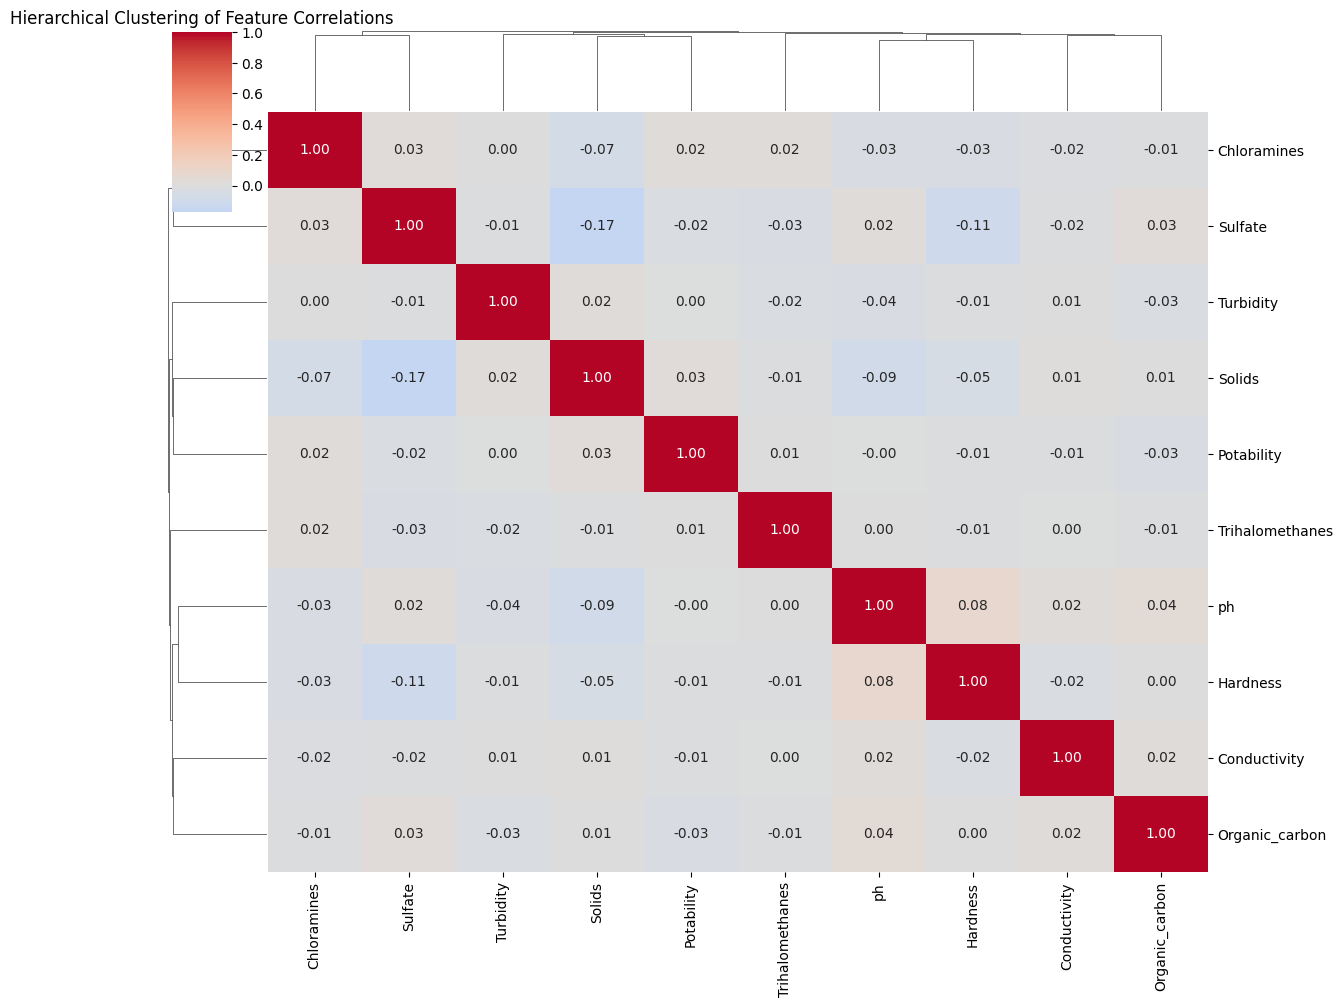

In [16]:
corr = df.corr()
sns.clustermap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f",
               figsize=(12, 10), row_colors=None, dendrogram_ratio=0.1)
plt.title('Hierarchical Clustering of Feature Correlations')
plt.show()

target_corr = corr['Potability'].sort_values(ascending=False)
px.bar(target_corr, title='Feature Correlation with Potability', 
       color=target_corr.values, color_continuous_scale='RdBu')

---

# Section 2

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

## Push Generated/new files from this section to your Github Repo

* Git add .

In [7]:
!git add .

* Git commit

In [8]:
!git commit -m "Aded EDA_Analysis notebook"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


* Git push

In [9]:
!git push origin main

Everything up-to-date
